In [ ]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format','{:,.2f}'.format)

In [ ]:
url  = 'https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/refs/heads/main/Car%20Upload%20data.csv'

df    = pd.read_csv(url)
rows , cols = df.shape
print(f'rows {rows}\ncols {cols}')

rows 2713
cols 43


In [ ]:
df.columns

Index(['id', 'name', 'model_name', 'price', 'price_currency', 'body_type',
       'source', 'location', 'drive', 'mileage', 'mileage_unit', 'color',
       'year_of_manufacture', 'annual_insurance', 'torque', 'cylinders',
       'fuel_type', 'aspiration', 'engine_size', 'transmission', 'horse_power',
       'seat_material', 'number_of_seats', 'heated_seats', 'air_conditioning',
       'trimming', 'infotainment_system', 'phone_connectivity',
       'auto_start_and_stop', 'keyless_entry_and_push_button_start',
       'steering_mounted_paddle_shifts', 'urban_consumption',
       'fuel_tank_capacity', 'highway_consumption', 'lane_assist',
       'reverse_camera', 'adaptive_cruise_control', 'standard_cruise_control',
       'antilock_braking_system', 'automatic_brake_hold_system',
       'tyre_pressure_monitoring_system', 'number_of_airbags', 'gps_tracker'],
      dtype='object')

#### Data Preprocessing

Missing Nos

1. Understanding your missing Data

  - MCAR - Its Just random
  - MAR  - Missing at Random.
  - MNAR

1. Deletion MCAR
2. Imputation
   - Measure central tendency/ Simple estimates
   - Constant
   - Predictive imputation***
   - Multiple imputation ***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   2713 non-null   int64  
 1   name                                 2713 non-null   object 
 2   model_name                           2713 non-null   object 
 3   price                                2713 non-null   int64  
 4   price_currency                       2713 non-null   object 
 5   body_type                            2713 non-null   object 
 6   source                               2713 non-null   object 
 7   location                             2713 non-null   object 
 8   drive                                2713 non-null   object 
 9   mileage                              2713 non-null   int64  
 10  mileage_unit                         2713 non-null   object 
 11  color                         

In [ ]:
# check for cardinality -
for col in df.select_dtypes(include='object').columns:
  print(f'{col} : {df[col].nunique()} Elements')

name : 828 Elements
model_name : 369 Elements
price_currency : 1 Elements
body_type : 12 Elements
source : 3 Elements
location : 22 Elements
drive : 3 Elements
mileage_unit : 2 Elements
color : 53 Elements
fuel_type : 5 Elements
aspiration : 2 Elements
transmission : 2 Elements
seat_material : 4 Elements
heated_seats : 2 Elements
air_conditioning : 2 Elements
trimming : 4 Elements
infotainment_system : 8 Elements
phone_connectivity : 2 Elements
auto_start_and_stop : 2 Elements
keyless_entry_and_push_button_start : 2 Elements
steering_mounted_paddle_shifts : 2 Elements
lane_assist : 2 Elements
reverse_camera : 2 Elements
adaptive_cruise_control : 2 Elements
standard_cruise_control : 2 Elements
antilock_braking_system : 2 Elements
automatic_brake_hold_system : 2 Elements
tyre_pressure_monitoring_system : 2 Elements
gps_tracker : 2 Elements


In [ ]:
df['mileage_unit'].unique()

df['mileage']  = df['mileage'].mask(df['mileage_unit']=='Miles',df['mileage']*1.60934)

In [ ]:
# Drop

del df['mileage_unit']
del df['price_currency']

In [ ]:
df.isna().sum()   #

,0
id,0
name,0
model_name,0
price,0
body_type,0
source,0
location,0
drive,0
mileage,0
color,778


<Axes: >

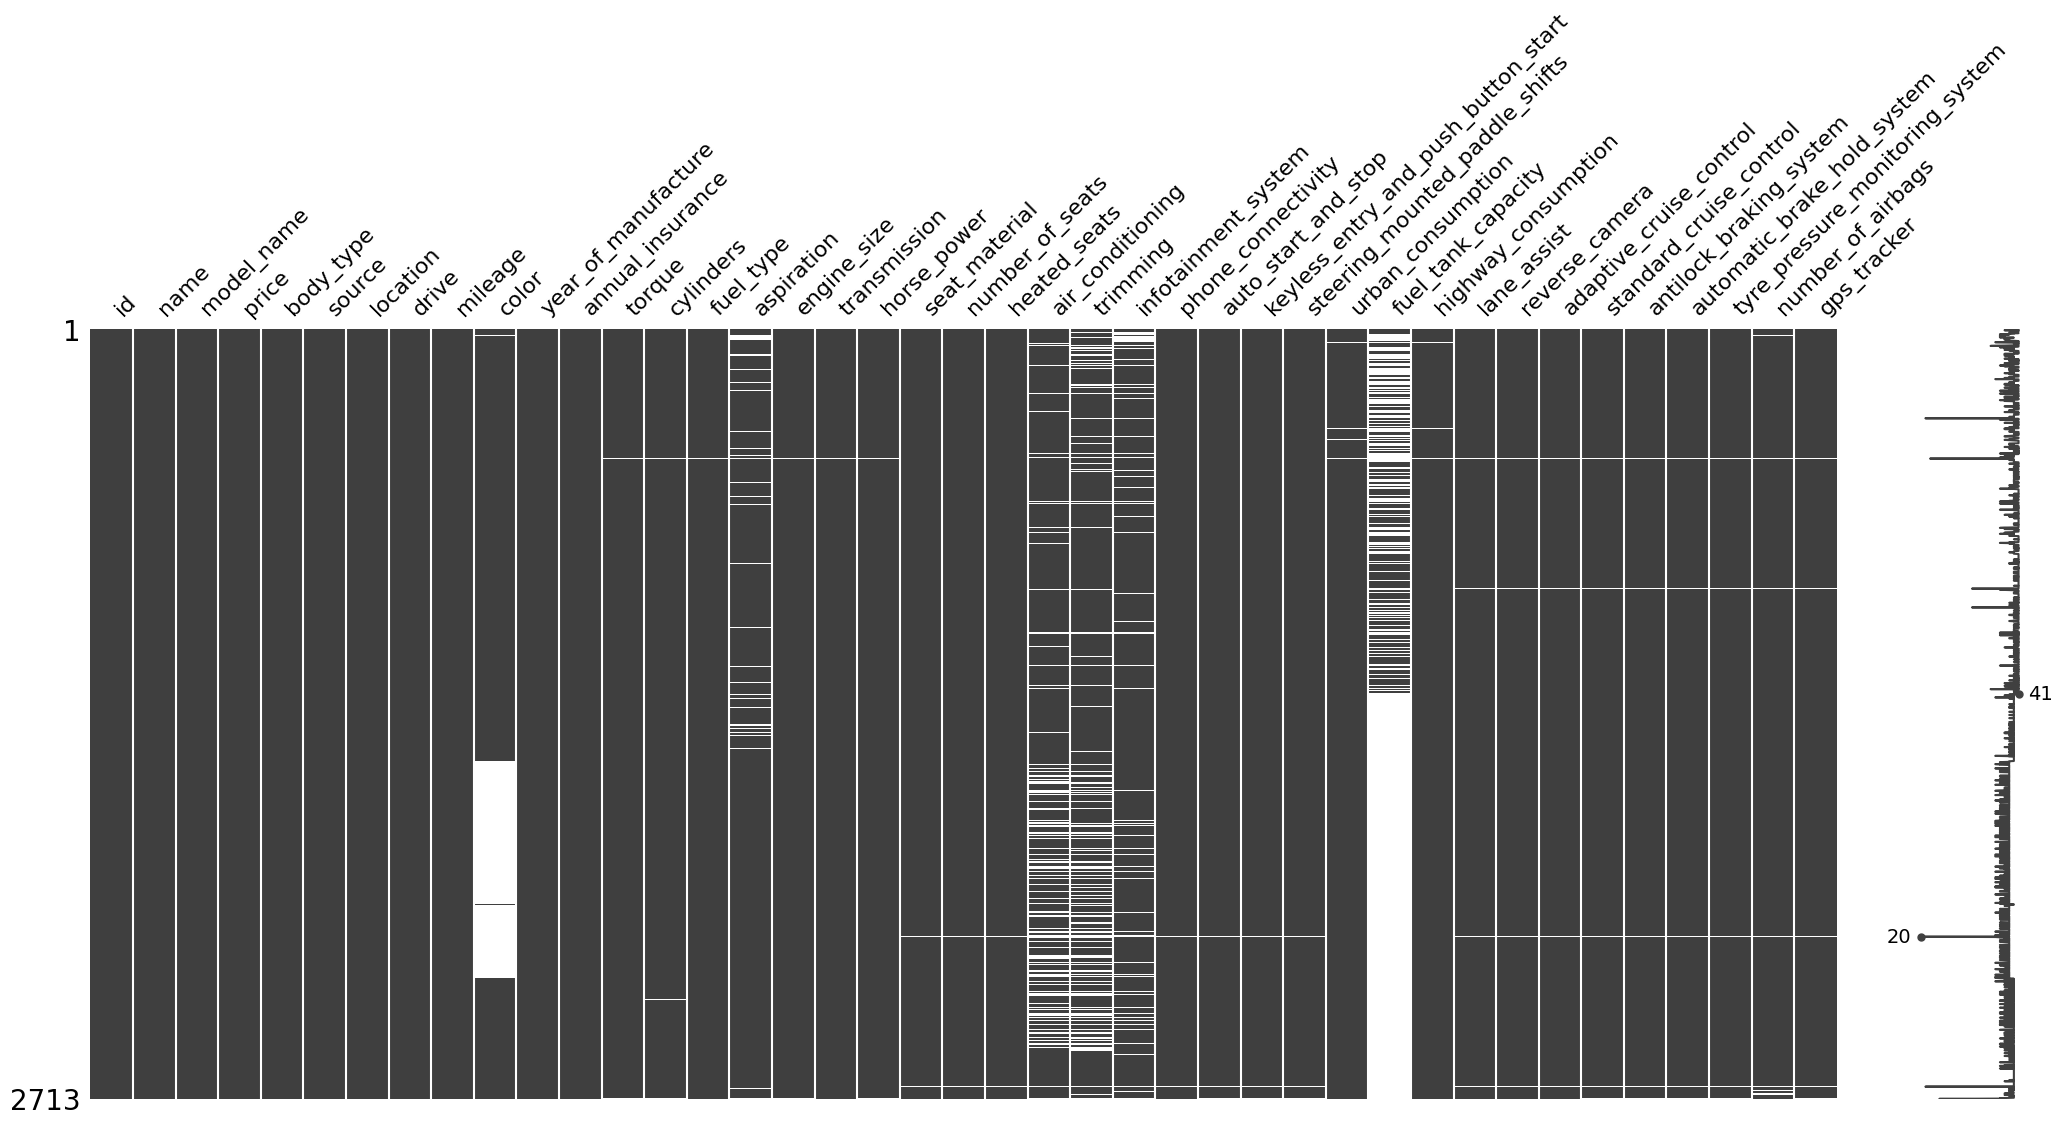

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
list1 = [1,2]
list2= [3,4]

list1 +list2

[1, 2, 3, 4]

In [ ]:
del df['id']

del df['fuel_tank_capacity']

In [ ]:
# create pipeline to cleaning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols_to_use_predictive    = ['highway_consumption','urban_consumption']
cols_to_use_not_available = ['air_conditioning','trimming','infotainment_system']
cols_to_iterative         = ['number_of_airbags']

combined_features          =  cols_to_use_predictive + cols_to_use_not_available + cols_to_iterative
categorical_cols_feature   = [col for col  in df.select_dtypes(include=['object','string','bool']).columns if col not in  combined_features]
numerical_columns          =  df.select_dtypes(include=['float','int']).columns.tolist()


custom_1_pipeline = Pipeline(steps=[
              ('imputer',SimpleImputer(strategy='constant'))
          ])

custom_2_pipeline = Pipeline(steps=[
              ('imputer',KNNImputer(n_neighbors=3))
          ])

custom_3_pipeline = Pipeline(steps=[
                      ('imputer',IterativeImputer())
                  ])

numerical_pipeline = Pipeline(steps=[
                    ('imputer',SimpleImputer(strategy='mean'))
                ])

categorical_pipeline = Pipeline(steps=[
                    ('imputer',SimpleImputer(strategy='most_frequent'))
                ])


# Combine

preprocessor = ColumnTransformer(transformers=[
                    ('custom_1',custom_1_pipeline,cols_to_use_not_available),
                    ('custom_2',custom_2_pipeline,cols_to_use_predictive),
                    ('custom_3',custom_3_pipeline,cols_to_iterative),
                    ('nums',numerical_pipeline,numerical_columns),
                    ('cats',categorical_pipeline,categorical_cols_feature),

                ])

#final our final pipeline

cleaning_pipeline = Pipeline([
            ('preprocessor',preprocessor)])
cleaning_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant'))]),
                                                  ['air_conditioning',
                                                   'trimming',
                                                   'infotainment_system']),
                                                 ('custom_2',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3))]),
                                                  ['highway_consumption',
                                                   'urban_consumption']),
                                                 ('custom_3',
                                                  Pipeline(steps=[('imputer',
                                                                   It...
                                                   'transmission',
                                                   'seat_material',
                                                   'heated_seats',
                                                   'phone_connectivity',
                                                   'auto_start_and_stop',
                                                   'keyless_entry_and_push_button_start',
                                                   'steering_mounted_paddle_shifts',
                                                   'lane_assist',
                                                   'reverse_camera',
                                                   'adaptive_cruise_control',
                                                   'standard_cruise_control',
                                                   'antilock_braking_system',
                                                   'automatic_brake_hold_system',
                                                   'tyre_pressure_monitoring_system',
                                                   'gps_tracker'])]))])

In [ ]:
cleaned_df = cleaning_pipeline.fit_transform(df)

In [ ]:
transformed_df = pd.DataFrame(cleaned_df, columns= (cols_to_use_not_available + cols_to_use_predictive+
                                   cols_to_iterative +numerical_columns+categorical_cols_feature
                                   ))

transformed_df

,air_conditioning,trimming,infotainment_system,highway_consumption,urban_consumption,number_of_airbags,price,mileage,year_of_manufacture,annual_insurance,...,keyless_entry_and_push_button_start,steering_mounted_paddle_shifts,lane_assist,reverse_camera,adaptive_cruise_control,standard_cruise_control,antilock_braking_system,automatic_brake_hold_system,tyre_pressure_monitoring_system,gps_tracker
0,Dual Zone,Plastic,Touchscreen Infotainment,20.00,18.00,6.00,"829,999.00","97,736.00","2,017.00","34,000.00",...,True,False,False,True,False,False,True,False,False,True
1,Multi Zone,Wood,Touchscreen Infotainment,8.00,6.00,9.00,"5,499,999.00","94,000.00","2,011.00","220,000.00",...,True,True,False,True,False,False,True,False,False,True
2,Dual Zone,Polished Metal,Touchscreen Infotainment,12.00,10.00,6.00,"1,667,499.00","99,459.00","2,014.00","66,700.00",...,False,True,True,True,False,False,True,False,False,True
3,Dual Zone,Polished Metal,Touchscreen Infotainment,20.00,18.00,6.00,"1,749,999.00","174,000.00","2,016.00","840,000.00",...,True,True,True,True,True,False,True,False,False,True
4,Dual Zone,missing_value,missing_value,12.00,10.00,6.00,"489,999.00","191,833.00","1,998.00","20,000.00",...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,missing_value,missing_value,Android Auto,9.60,7.40,8.00,"1,800,000.00","67,150.00","2,016.00","81,000.00",...,True,False,False,True,False,False,True,False,True,True
2709,missing_value,missing_value,missing_value,5.40,8.40,7.00,"950,000.00","103,568.00","2,012.00","42,750.00",...,False,False,False,False,False,False,True,False,False,True
2710,Dual Zone,missing_value,Touchscreen Infotainment,15.10,11.60,6.47,"2,150,000.00","82,680.00","2,016.00","96,750.00",...,True,True,False,True,True,False,True,True,False,False
2711,missing_value,missing_value,missing_value,12.00,9.00,2.00,"1,850,000.00","170,000.00","2,014.00","111,000.00",...,True,True,False,False,False,False,True,True,True,True


In [ ]:
transformed_df.isna().sum() # No Missing Nos

,0
air_conditioning,0
trimming,0
infotainment_system,0
highway_consumption,0
urban_consumption,0
number_of_airbags,0
price,0
mileage,0
year_of_manufacture,0
annual_insurance,0


In [ ]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   air_conditioning                     2713 non-null   object
 1   trimming                             2713 non-null   object
 2   infotainment_system                  2713 non-null   object
 3   highway_consumption                  2713 non-null   object
 4   urban_consumption                    2713 non-null   object
 5   number_of_airbags                    2713 non-null   object
 6   price                                2713 non-null   object
 7   mileage                              2713 non-null   object
 8   year_of_manufacture                  2713 non-null   object
 9   annual_insurance                     2713 non-null   object
 10  torque                               2713 non-null   object
 11  cylinders                            2713 n

In [ ]:
# convert back to numerical
transformed_df[numerical_columns] = transformed_df[numerical_columns].astype('float')

In [ ]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_conditioning                     2713 non-null   object 
 1   trimming                             2713 non-null   object 
 2   infotainment_system                  2713 non-null   object 
 3   highway_consumption                  2713 non-null   float64
 4   urban_consumption                    2713 non-null   float64
 5   number_of_airbags                    2713 non-null   float64
 6   price                                2713 non-null   float64
 7   mileage                              2713 non-null   float64
 8   year_of_manufacture                  2713 non-null   float64
 9   annual_insurance                     2713 non-null   float64
 10  torque                               2713 non-null   float64
 11  cylinders                     

In [ ]:
transformed_df['name'].str.split().str[0].nunique()

59

In [ ]:
# Lets try to reduce dimensionality
transformed_df['proper_name'] = transformed_df['name'].str.split().str[0]
transformed_df.drop(columns=['name','model_name'],inplace=True)

In [ ]:
transformed_df.head()

,air_conditioning,trimming,infotainment_system,highway_consumption,urban_consumption,number_of_airbags,price,mileage,year_of_manufacture,annual_insurance,...,steering_mounted_paddle_shifts,lane_assist,reverse_camera,adaptive_cruise_control,standard_cruise_control,antilock_braking_system,automatic_brake_hold_system,tyre_pressure_monitoring_system,gps_tracker,proper_name
0,Dual Zone,Plastic,Touchscreen Infotainment,18.00,18.00,20.00,"829,999.00","97,736.00","2,017.00","34,000.00",...,False,False,True,False,False,True,False,False,True,Nissan
1,Multi Zone,Wood,Touchscreen Infotainment,6.00,6.00,8.00,"5,499,999.00","94,000.00","2,011.00","220,000.00",...,True,False,True,False,False,True,False,False,True,Toyota
2,Dual Zone,Polished Metal,Touchscreen Infotainment,10.00,10.00,12.00,"1,667,499.00","99,459.00","2,014.00","66,700.00",...,True,True,True,False,False,True,False,False,True,Subaru
3,Dual Zone,Polished Metal,Touchscreen Infotainment,18.00,18.00,20.00,"1,749,999.00","174,000.00","2,016.00","840,000.00",...,True,True,True,True,False,True,False,False,True,Volkswagen
4,Dual Zone,missing_value,missing_value,10.00,10.00,12.00,"489,999.00","191,833.00","1,998.00","20,000.00",...,False,False,False,False,False,True,False,False,True,Mitsubishi


In [ ]:
categorical_cols = transformed_df.select_dtypes(include='object').columns
categorical_cols

Index(['air_conditioning', 'trimming', 'infotainment_system', 'body_type',
       'source', 'location', 'drive', 'color', 'fuel_type', 'aspiration',
       'transmission', 'seat_material', 'heated_seats', 'phone_connectivity',
       'auto_start_and_stop', 'keyless_entry_and_push_button_start',
       'steering_mounted_paddle_shifts', 'lane_assist', 'reverse_camera',
       'adaptive_cruise_control', 'standard_cruise_control',
       'antilock_braking_system', 'automatic_brake_hold_system',
       'tyre_pressure_monitoring_system', 'gps_tracker', 'proper_name'],
      dtype='object')

In [ ]:
# Lets encoded use simple pd.get_dummies  # Sklearn encoder

categorical_cols = transformed_df.select_dtypes(include='object').columns

encoded_df    = pd.get_dummies(transformed_df,columns=categorical_cols,dtype='float')
encoded_df.shape

(2713, 223)

In [ ]:
from sklearn.model_selection import train_test_split  # Validation , One-hold validation

X = encoded_df.drop(columns=['price'])  # Input features
y = encoded_df['price']                 # Target feature

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.15 , random_state=42)  # r

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error


# Function to evaluate the model and check for overfitting

def evaluate_and_check_overfitting(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)  # Fit the model


    y_train_pred = model.predict(X_train)  # Predict on Train
    y_test_pred  = model.predict(X_test)   # Predict on Tes

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Train
    rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))    # Test


    overfitting_message = "No overfitting detected."  #

    if rmse_train < rmse_test:
        overfitting_message = "Possible overfitting detected."

    return {
            'RMSE_Train': rmse_train,
            'RMSE_Test' : rmse_test,
            'Overfitting_Status': overfitting_message
        }


In [ ]:
# Lets now train a quick regressors

from sklearn.tree       import DecisionTreeRegressor
from sklearn.ensemble   import RandomForestRegressor , GradientBoostingRegressor  # Ensemble ,
from sklearn.linear_model import LinearRegression

models = [
            ("Linear Regression" ,LinearRegression()),
            ("Random Forest"     ,RandomForestRegressor()),
            ("Gradient Boosting" ,GradientBoostingRegressor()),
            ("Decision Tree"     , DecisionTreeRegressor(max_depth=3))
        ]

results = []

for model_name, model in models:

    model_results = evaluate_and_check_overfitting(model, X_train, X_test, y_train, y_test)

    model_results['Model'] = model_name
    results.append(model_results)


results_df        = pd.DataFrame(results)

results_df['var'] =  results_df['RMSE_Test'] - results_df['RMSE_Train']
results_df.sort_values(by='RMSE_Test')

,RMSE_Train,RMSE_Test,Overfitting_Status,Model,var
2,"365,336.90","560,190.30",Possible overfitting detected.,Gradient Boosting,"194,853.39"
1,"584,860.30","595,783.40",Possible overfitting detected.,Random Forest,"10,923.09"
0,"1,399,545.62","924,536.32",No overfitting detected.,Linear Regression,"-475,009.30"
3,"1,627,784.44","1,003,592.75",No overfitting detected.,Decision Tree,"-624,191.69"


In [ ]:
age , height, gender , Has_stroke
23     1      Male       0
30     2      Female     1

### Feature Selection

1. Train Faster
2. reduce model complexity , make it easier,
3. Model accuracy - Overfitting

**Methods**

1. **Filter Methods**

- Select feature based on their scores in statistical test for their correlation
outcome varibles

Disdvantage

- They ignore potential combined efect of individual features

Advantage

- Simple
- Independent of learning algorithm


---
---

2. **Wrapper Methods**

- Evaluate feature subsets by training a model on different features and selecting the subset that gives best performance

Techniques

1. Forward selection
2. Backward Elimination
3. Recursive Feature Elimination


Adv

- Account for feature interaction
- Yield better results

Disa

- Computationally expensive esp of large dataset.


3. **Embeded Methods**


- They perform feature selection during model training process, they are part of algos
Regularization techniques that penalizes less important features

LASSO AND RIDGE

1. LASSO
2. RIDGE
3. Tree-Based Model Decision > Feature importance

In [ ]:
from sklearn.feature_selection import SelectKBest , f_regression



filter_selector  =  SelectKBest(score_func=f_regression,k=30)  # F- Stats
X_train_filter   =  filter_selector.fit_transform(X_train,y_train)
X_test_filter    =  filter_selector.transform(X_test)


In [ ]:
pd.DataFrame(X_train_filter, columns=X_train.columns[filter_selector.get_support()])

,highway_consumption,urban_consumption,mileage,year_of_manufacture,annual_insurance,torque,engine_size,horse_power,urban_consumption,highway_consumption,...,heated_seats_True,steering_mounted_paddle_shifts_False,steering_mounted_paddle_shifts_True,adaptive_cruise_control_False,adaptive_cruise_control_True,automatic_brake_hold_system_False,automatic_brake_hold_system_True,tyre_pressure_monitoring_system_False,tyre_pressure_monitoring_system_True,proper_name_Lamborghini
0,10.00,10.00,"65,000.00","2,016.00","157,500.00",185.00,"2,000.00",155.00,10.00,10.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
1,10.00,10.00,"91,738.00","2,013.00","112,500.00",320.00,"2,000.00",180.00,10.00,10.00,...,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
2,10.00,10.00,"98,000.00","2,016.00","148,500.00",270.00,"2,000.00",180.00,10.00,10.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
3,18.00,18.00,"98,000.00","2,017.00","54,000.00",230.00,"1,200.00",128.00,18.00,18.00,...,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
4,10.00,10.00,"133,000.00","2,013.00","76,500.00",270.00,"2,000.00",181.00,10.00,10.00,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,10.00,10.00,"155,000.00","2,014.00","87,500.00",185.00,"2,000.00",155.00,10.00,10.00,...,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
2302,6.00,6.00,"28,000.00","2,021.00","2,240,000.00",850.00,"4,000.00",650.00,6.00,6.00,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00
2303,13.00,13.00,"72,000.00","2,017.00","174,000.00",300.00,"2,000.00",184.00,13.00,13.00,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
2304,8.00,8.00,"59,000.00","2,018.00","334,240.00",603.00,"3,600.00",440.00,8.00,8.00,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00


In [ ]:
# df[ df['price']==df['price'].max()]

,name,model_name,price,body_type,source,location,drive,mileage,color,year_of_manufacture,...,highway_consumption,lane_assist,reverse_camera,adaptive_cruise_control,standard_cruise_control,antilock_braking_system,automatic_brake_hold_system,tyre_pressure_monitoring_system,number_of_airbags,gps_tracker
335,Rolls-Royce Phantom,Phantom,69783000,Coupe,Foreign Used,United Kingdom,AWD,"54,717.56",Grey,2021,...,6.50,True,True,True,True,True,True,True,8.00,True


In [ ]:
# Filter


from sklearn.feature_selection import SelectKBest , f_regression



filter_selector  = SelectKBest(score_func=f_regression,k=30)  # F- Stats
X_train_filter   = filter_selector.fit_transform(X_train,y_train)
X_test_filter   =  filter_selector.transform(X_test)


results = []

for model_name, model in models:

    model_results = evaluate_and_check_overfitting(model, X_train, X_test, y_train, y_test)

    model_results['Model'] = model_name
    results.append(model_results)


results_df        = pd.DataFrame(results)

results_df['var'] =  results_df['RMSE_Test'] - results_df['RMSE_Train']
results_df.sort_values(by='RMSE_Test')

,RMSE_Train,RMSE_Test,Overfitting_Status,Model,var
2,"365,336.90","558,974.98",Possible overfitting detected.,Gradient Boosting,"193,638.08"
1,"577,552.20","606,810.05",Possible overfitting detected.,Random Forest,"29,257.85"
0,"1,399,545.62","924,536.32",No overfitting detected.,Linear Regression,"-475,009.30"
3,"1,627,784.44","1,003,592.75",No overfitting detected.,Decision Tree,"-624,191.69"


In [ ]:
%%time

# Wrapper methods

from sklearn.feature_selection import RFE


results = []



for model_name, model in models:
    rfe_selector = RFE(estimator=model, n_features_to_select=30)
    X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
    X_test_rfe = rfe_selector.transform(X_test)

    model_results = evaluate_and_check_overfitting(model, X_train_rfe, X_test_rfe, y_train, y_test)

    model_results['Model'] = model_name
    results.append(model_results)


results_df        = pd.DataFrame(results)

results_df['var'] =  results_df['RMSE_Test'] - results_df['RMSE_Train']
results_df.sort_values(by='RMSE_Test')


CPU times: user 17min 36s, sys: 894 ms, total: 17min 37s
Wall time: 18min 20s


,RMSE_Train,RMSE_Test,Overfitting_Status,Model,var
2,"359,776.88","557,609.23",Possible overfitting detected.,Gradient Boosting,"197,832.35"
1,"667,154.31","573,081.57",No overfitting detected.,Random Forest,"-94,072.74"
3,"1,627,784.44","1,003,592.75",No overfitting detected.,Decision Tree,"-624,191.69"
0,"3,453,074.57","3,178,952.24",No overfitting detected.,Linear Regression,"-274,122.33"


In [ ]:
# EMBEDED MODEL

In [ ]:
from sklearn.linear_model import Lasso , Ridge

models = [
            ("Lasso" ,Lasso(alpha=0.6)),
            ("RIDGE"     ,Ridge()),

        ]

results = []

for model_name, model in models:

    model_results = evaluate_and_check_overfitting(model, X_train, X_test, y_train, y_test)

    model_results['Model'] = model_name
    results.append(model_results)


results_df        = pd.DataFrame(results)

results_df['var'] =  results_df['RMSE_Test'] - results_df['RMSE_Train']
results_df.sort_values(by='RMSE_Test')

In [ ]:
# Train as simple decision
# Extract Feature importance
# Subset the most features
# Use them in another model

In [ ]:
## CLASS NEW

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Instead of reading the excel into url, store the file path in it
url = 'https://raw.githubusercontent.com/irungus/Predictive-and-Optimization-Analytics/main/a_IBM%20Telco%20Customers%20Churn%20Datasets.xlsx'

# Now, pd.ExcelFile can use this path to open the file
excel = pd.ExcelFile(url)
excel.sheet_names

['Customer_Info',
 'Service_Options',
 'Online_Services',
 'Payment_Info',
 'Acerno_Cache_XXXXX',
 'Status_Analysis',
 'Location_Data',
 'Population',
 'Telco_Churn']

In [9]:
# Import excel sheets in to pandas dataframe
df_telco = pd.read_excel(excel, sheet_name='Telco_Churn')
df_status = pd.read_excel(excel, sheet_name='Status_Analysis')
df_Customer_Info = pd.read_excel(excel, sheet_name='Customer_Info')
df_loc = pd.read_excel(excel, sheet_name='Location_Data')


In [13]:
print(df_telco.columns)  # Check column names in df_telco
print(df_Customer_Info.columns)  # Check column names in cust_info

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')
Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'partner',
       'dependents', 'number_of_dependents', 'married'],
      dtype='object')


In [15]:
df_telco.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [16]:
df_status.sample(1).T

,2976
customer_id,4254-QPEDE
satisfaction_score,4
cltv,4275
customer_status,Stayed
churn_score,23
churn_label,No
churn_value,0
churn_category,Not Applicable
churn_reason,NaN


In [18]:
cust_info = df_loc.merge(df_Customer_Info, on='customer_id', how = 'left')

df_telco.rename(columns={"Customer ID": "customer_id"}, inplace=True)

df = df_telco.merge(cust_info, on='customer_id', how = 'left')

df.shape

(7043, 45)

In [19]:
df.columns

Index(['customer_id', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'country', 'state', 'city', 'zip_code',
       'total_population', 'latitude', 'longitude', 'gender', 'age',
       'under_30', 'senior_citizen', 'partner', 'dependents',
       'number_of_dependents', 'married'],
      dtype='object')